<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/5_Std_dataset_Hyper_Parameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Hyper Parameter Tuning Results

# INSTALL LIBRARIES

In [1]:
!pip install tensorflow keras keras-tuner numpy pandas scikit-learn
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 9.9 MB/s eta 0:00:00


In [2]:
# Core libraries
import numpy as np
import pandas as pd

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# TensorFlow/Keras for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Keras Tuner for hyperparameter tuning
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch

# LOAD FILES

In [3]:
import os
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Ensure the subdirectory exists
os.makedirs(subdirectory, exist_ok=True)

# Define the full file path
master_results_file_path = os.path.join(subdirectory, 'master_resultsStd.csv')

# Check if the file exists and load it
if os.path.exists(master_results_file_path):
    master_resultsStd = pd.read_csv(master_results_file_path)
    print(f"File 'master_resultsStd.csv' loaded successfully!")
    print(master_resultsStd.head())  # Display the first few rows of the DataFrame
else:
    print(f"File 'master_resultsStd.csv' not found in '{subdirectory}'. Please check the file path.")

Mounted at /content/drive
File 'master_resultsStd.csv' loaded successfully!
      Target                        Model  Train R²   Test R²       MAE  \
0  new_price            Linear Regression  0.685435  0.683708  0.439345   
1  new_price      Random Forest Regressor  0.977331  0.851468  0.252210   
2  new_price            XGBoost Regressor  0.840576  0.800946  0.327958   
3  new_price  Gradient Boosting Regressor  0.803861  0.784936  0.343109   
4         PC            Linear Regression  0.983019  0.982833  0.098279   

        MSE      RMSE        MAPE Comments Type  
0  0.314043  0.560396  239.091754   Normal  NaN  
1  0.147476  0.384026  140.667582   Normal  NaN  
2  0.197639  0.444566  179.455016   Normal  NaN  
3  0.213535  0.462099  194.677003   Normal  NaN  
4  0.017093  0.130741   16.302767   Normal  NaN  


In [4]:
master_resultsStd.head(20)

,Target,Model,Train R²,Test R²,MAE,MSE,RMSE,MAPE,Comments,Type
0,new_price,Linear Regression,0.685435,0.683708,4.393449e-01,3.140434e-01,5.603957e-01,2.390918e+02,Normal,NaN
1,new_price,Random Forest Regressor,0.977331,0.851468,2.522105e-01,1.474763e-01,3.840264e-01,1.406676e+02,Normal,NaN
2,new_price,XGBoost Regressor,0.840576,0.800946,3.279583e-01,1.976388e-01,4.445658e-01,1.794550e+02,Normal,NaN
3,new_price,Gradient Boosting Regressor,0.803861,0.784936,3.431089e-01,2.135351e-01,4.620986e-01,1.946770e+02,Normal,NaN
4,PC,Linear Regression,0.983019,0.982833,9.827928e-02,1.709316e-02,1.307408e-01,1.630277e+01,Normal,NaN
5,PC,Random Forest Regressor,1.000000,1.000000,2.048259e-14,8.368542e-28,2.892843e-14,2.048343e-12,Normal,NaN
6,PC,XGBoost Regressor,0.999957,0.999957,6.085647e-03,4.312855e-05,6.567233e-03,6.600120e-01,Normal,NaN
7,PC,Gradient Boosting Regressor,1.000000,1.000000,1.082815e-08,2.147548e-16,1.465452e-08,2.531636e-06,Normal,NaN
8,PC with multicollinearity and potential overfi...,Linear Regression,0.983019,0.982833,9.827928e-02,1.709316e-02,1.307408e-01,1.630277e+01,Normal,NaN
9,PC with multicollinearity and potential overfi...,Random Forest Regressor,1.000000,1.000000,1.946421e-14,7.698179e-28,2.774559e-14,1.960379e-12,Normal,NaN


In [5]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the file path in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv5.csv'

# Read the file into a DataFrame
try:
    merged_dataset = pd.read_csv(file_path)
    print("[INFO] File loaded successfully into 'merged_dataset'.")
    print(merged_dataset.head())  # Display the first 5 rows
except FileNotFoundError:
    print(f"[ERROR] File not found at '{file_path}'. Please check the file path and try again.")
except Exception as e:
    print(f"[ERROR] An error occurred while reading the file: {e}")

Mounted at /content/drive
[INFO] File loaded successfully into 'merged_dataset'.
   saleable_area(ft^2)  unit_rate     floor       CPI        IR        MW  \
0             0.260534  -0.314185  1.757769  1.318729 -1.059593 -1.524527   
1             0.223632  -0.424514  0.501134  1.318729 -1.059593 -1.524527   
2            -0.390423  -0.383380 -0.001520  1.318729 -1.059593 -1.524527   
3             1.857067  -1.080034  0.878125  1.318729 -1.059593 -1.524527   
4             1.163345  -0.751664  0.417359  1.318729 -1.059593 -1.524527   

         M3        UR       GDP        CI  ...  floor_height_floor_46to50  \
0 -0.604983  2.994659 -3.472663  1.115625  ...                  -0.123415   
1 -0.604983  2.994659 -3.472663  1.115625  ...                  -0.123415   
2 -0.604983  2.994659 -3.472663  1.115625  ...                  -0.123415   
3 -0.604983  2.994659 -3.472663  1.115625  ...                  -0.123415   
4 -0.604983  2.994659 -3.472663  1.115625  ...                  -0.1234

In [6]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105114 entries, 0 to 105113
Data columns (total 71 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   saleable_area(ft^2)                             105114 non-null  float64
 1   unit_rate                                       105114 non-null  float64
 2   floor                                           105114 non-null  float64
 3   CPI                                             105114 non-null  float64
 4   IR                                              105114 non-null  float64
 5   MW                                              105114 non-null  float64
 6   M3                                              105114 non-null  float64
 7   UR                                              105114 non-null  float64
 8   GDP                                             105114 non-null  float64
 9   CI                        

# HYPERPARAMETER TUNING

In [7]:
# Define the feature matrix (X) and target variables (y)

features = merged_dataset.drop(columns=['new_price', 'PC'])
targets_Std = merged_dataset[['new_price', 'PC']]

X = features.copy()
y = targets_Std.copy()

In [8]:
import os
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from keras_tuner import RandomSearch
import numpy as np
import tensorflow as tf

# File paths
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'
hp_results_file_path = os.path.join(subdirectory, "HP_ResultsStd.csv")

# Load dataset (assuming `merged_dataset` exists)
features = merged_dataset.drop(columns=['new_price', 'PC'])
targets_Std = merged_dataset[['new_price', 'PC']]
X = features.copy()
y = targets_Std.copy()

# Normalize features and targets
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)
target_scalers = {col: StandardScaler() for col in targets_Std.columns}
y_scaled = pd.DataFrame({col: target_scalers[col].fit_transform(targets_Std[[col]]).flatten() for col in targets_Std.columns})

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Subset the dataset for faster tuning
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)
X_train_sample_lstm = X_train_sample.reshape((X_train_sample.shape[0], 1, X_train_sample.shape[1]))

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)

    for i in range(num_layers):
        return_sequences = i < (num_layers - 1)
        model.add(LSTM(
            units=hp.Int(f'units_layer_{i+1}', min_value=32, max_value=128, step=32),
            activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid']),
            return_sequences=return_sequences,
            input_shape=(X_train_sample_lstm.shape[1], X_train_sample_lstm.shape[2]) if i == 0 else None
        ))
        model.add(Dropout(rate=hp.Choice(f'dropout_layer_{i+1}', values=[0.2, 0.3, 0.4])))

    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
                  loss=hp.Choice('loss', values=['mse', 'mae', 'huber']))
    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='lstm_hyper_tuning'
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Initialize results table
hp_resultsStd = pd.DataFrame(columns=["Target", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Best Hyperparameters"])

# Loop through targets (e.g., new_price and PC)
for target_name in ["new_price", "PC"]:
    y_train_target_sample = y_train_sample[[target_name]].values

    # Hyperparameter tuning
    tuner.search(
        X_train_sample_lstm,
        y_train_target_sample,
        validation_split=0.1,
        epochs=20,
        batch_size=64,
        callbacks=[early_stopping]
    )

    # Get best hyperparameters and build the best model
    best_hps = tuner.get_best_hyperparameters(1)[0]
    best_model = tuner.hypermodel.build(best_hps)

    # Train the best model
    history = best_model.fit(
        X_train_lstm,
        y_train[[target_name]].values,
        validation_data=(X_test_lstm, y_test[[target_name]].values),
        epochs=20,
        batch_size=64,
        callbacks=[early_stopping]
    )

    # Evaluate the model
    train_predictions = best_model.predict(X_train_lstm)
    test_predictions = best_model.predict(X_test_lstm)

    scaler_y = target_scalers[target_name]
    train_predictions_rescaled = scaler_y.inverse_transform(train_predictions)
    test_predictions_rescaled = scaler_y.inverse_transform(test_predictions)

    y_train_rescaled = scaler_y.inverse_transform(y_train[[target_name]])
    y_test_rescaled = scaler_y.inverse_transform(y_test[[target_name]])

    train_r2 = r2_score(y_train_rescaled, train_predictions_rescaled)
    test_r2 = r2_score(y_test_rescaled, test_predictions_rescaled)
    mae = mean_absolute_error(y_test_rescaled, test_predictions_rescaled)
    mse = mean_squared_error(y_test_rescaled, test_predictions_rescaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test_rescaled - test_predictions_rescaled) / y_test_rescaled)) * 100

    # Add results
    new_results = {
        "Target": target_name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Best Hyperparameters": str({
            "num_layers": best_hps.get("num_layers"),
            **{f"units_layer_{i+1}": best_hps.get(f"units_layer_{i+1}") for i in range(best_hps.get("num_layers"))},
            **{f"dropout_layer_{i+1}": best_hps.get(f"dropout_layer_{i+1}") for i in range(best_hps.get("num_layers"))},
            "activation": best_hps.get("activation"),
            "optimizer": best_hps.get("optimizer"),
            "loss": best_hps.get("loss"),
        })
    }
    hp_resultsStd = pd.concat([hp_resultsStd, pd.DataFrame([new_results])], ignore_index=True)

# Save results to file
hp_resultsStd.to_csv(hp_results_file_path, index=False)
print(f"[INFO] Hyperparameter tuning results saved to '{hp_results_file_path}'.")

Trial 5 Complete [00h 00m 14s]
val_loss: 0.004447232931852341

Best val_loss So Far: 0.0020701424218714237
Total elapsed time: 00h 02m 09s
Epoch 1/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.0974 - val_loss: 0.0028
Epoch 2/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0128 - val_loss: 0.0023
Epoch 3/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0106 - val_loss: 0.0019
Epoch 4/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.0101 - val_loss: 0.0017
Epoch 5/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0096 - val_loss: 0.0015
Epoch 6/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0093 - val_loss: 0.0014
Epoch 7/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0087 - val_loss: 0.0014
Epoch 8/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.0088 - val_loss: 0.0012
Epoch 9/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0087 - val_loss: 0.0013
Epoch 10/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss

<ipython-input-8-7d877a08bd3d>:140: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hp_resultsStd = pd.concat([hp_resultsStd, pd.DataFrame([new_results])], ignore_index=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1314/1314 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0692 - val_loss: 5.2430e-04
Epoch 2/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0067 - val_loss: 3.0467e-04
Epoch 3/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0059 - val_loss: 3.0546e-04
Epoch 4/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0055 - val_loss: 2.3170e-04
Epoch 5/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0051 - val_loss: 2.7830e-04
Epoch 6/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0050 - val_loss: 3.2836e-04
Epoch 7/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0048 - val_loss: 2.6370e-04
2628/2628 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[INFO] Hyperparameter tuning results saved to '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/HP_ResultsStd.csv'.


# BEST HYPER TUNED ARCHITECTURE

In [19]:
# Record Architecture

# File path for the hyperparameter tuning results
hp_results_file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/HP_ResultsStd.csv'

# Load the hyperparameter tuning results
hp_resultsStd = pd.read_csv(hp_results_file_path)

# Convert the 'Best Hyperparameters' column from string to dictionary
hp_resultsStd['Best Hyperparameters'] = hp_resultsStd['Best Hyperparameters'].apply(eval)

# Extract results for `new_price` and `PC`
results_new_price = hp_resultsStd[hp_resultsStd["Target"] == "new_price"].iloc[0]
results_pc = hp_resultsStd[hp_resultsStd["Target"] == "PC"].iloc[0]

# Extract best hyperparameters
hyperparams_new_price = results_new_price["Best Hyperparameters"]
hyperparams_pc = results_pc["Best Hyperparameters"]

# Prepare data for the table
table_data = {
    "Target": ["Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE"],
    "Hypertuned LSTM for new_price": [
        results_new_price["Train R²"] if pd.notnull(results_new_price["Train R²"]) else "nan",
        results_new_price["Test R²"],
        results_new_price["MAE"],
        results_new_price["MSE"],
        results_new_price["RMSE"],
        results_new_price["MAPE"]
    ],
    "Hypertuned LSTM for PC": [
        results_pc["Train R²"] if pd.notnull(results_pc["Train R²"]) else "nan",
        results_pc["Test R²"],
        results_pc["MAE"],
        results_pc["MSE"],
        results_pc["RMSE"],
        results_pc["MAPE"]
    ]
}

# Add the Best Hyperparameters row
table_data["Target"].append("Best Hyperparameters")
table_data["Hypertuned LSTM for new_price"].append(str(hyperparams_new_price))
table_data["Hypertuned LSTM for PC"].append(str(hyperparams_pc))

# Convert the data into a DataFrame
table_df = pd.DataFrame(table_data)

print(table_df)  # Optional: Display the DataFrame to confirm the structure

                 Target                      Hypertuned LSTM for new_price  \
0              Train R²                                            0.99825   
1               Test R²                                           0.998117   
2                   MAE                                           0.028111   
3                   MSE                                           0.001868   
4                  RMSE                                           0.043226   
5                  MAPE                                          18.047825   
6  Best Hyperparameters  {'num_layers': 3, 'units_layer_1': 96, 'units_...   

                              Hypertuned LSTM for PC  
0                                           0.999543  
1                                           0.999535  
2                                            0.01599  
3                                           0.000463  
4                                           0.021527  
5                                           4

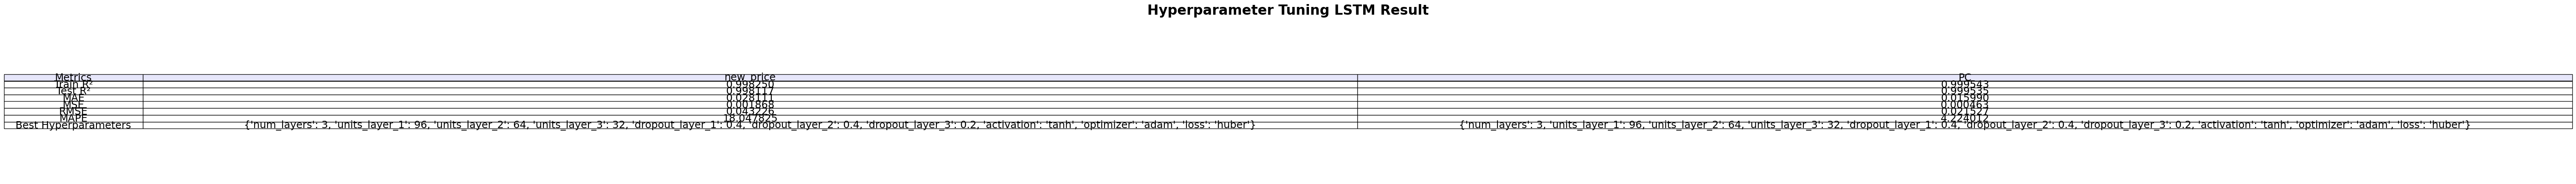

[INFO] Word document saved to '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/HP_ResultsStd_A4.docx'.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Pt, Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.oxml import OxmlElement

# Load the results from the hyperparameter tuning process
hp_results_file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/HP_ResultsStd.csv'
hp_resultsStd = pd.read_csv(hp_results_file_path)

# Convert 'Best Hyperparameters' column from string to dictionary for better formatting
hp_resultsStd['Best Hyperparameters'] = hp_resultsStd['Best Hyperparameters'].apply(eval)

# Format all numerical columns to 6 decimal places
for col in ["Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE"]:
    hp_resultsStd[col] = hp_resultsStd[col].apply(lambda x: f"{x:.6f}")

# Transpose the table for the desired orientation
transposed_table = hp_resultsStd.set_index("Target").T.reset_index()
transposed_table.rename(columns={"index": "Metrics"}, inplace=True)

# ======= Display the table on the screen =======
fig, ax = plt.subplots(figsize=(8, 5))  # Adjust figure size for better display
ax.axis('tight')
ax.axis('off')

# Create the display table
table = ax.table(
    cellText=transposed_table.values,
    colLabels=transposed_table.columns,
    cellLoc='center',
    loc='center',
    colColours=["lavender"] * len(transposed_table.columns),
)

# Adjust table style
table.auto_set_font_size(False)
table.set_fontsize(18)  # Increased font size by 150%
table.auto_set_column_width(col=list(range(len(transposed_table.columns))))

# Highlight the title above the table
ax.set_title(
    "Hyperparameter Tuning LSTM Result",
    fontsize=24,  # Increased font size by 150%
    fontweight="bold",
    pad=15
)

plt.show()

# ======= Save the table to a Word document =======
doc = Document()

# Set page layout to A4 portrait
section = doc.sections[0]
section.page_height = Inches(11.69)  # A4 height in inches
section.page_width = Inches(8.27)   # A4 width in inches
section.left_margin = Inches(1)
section.right_margin = Inches(1)
section.top_margin = Inches(1)
section.bottom_margin = Inches(1)

# Add the title
title = doc.add_paragraph("Hyperparameter Tuning LSTM Result")
title.alignment = WD_ALIGN_PARAGRAPH.CENTER
title.style.font.size = Pt(24)  # Increased font size by 150%
title.style.font.bold = True

# Add the transposed table to the document
word_table = doc.add_table(rows=1, cols=len(transposed_table.columns))
word_table.style = 'Table Grid'

# Add the header row
header_cells = word_table.rows[0].cells
for idx, col_name in enumerate(transposed_table.columns):
    header_cells[idx].text = col_name
    header_cells[idx].paragraphs[0].runs[0].font.size = Pt(24)  # Increased font size by 150% (16pt → 24pt)

# Add the data rows
for row_idx, row in transposed_table.iterrows():
    row_cells = word_table.add_row().cells
    for col_idx, cell_value in enumerate(row):
        row_cells[col_idx].text = str(cell_value)
        row_cells[col_idx].paragraphs[0].runs[0].font.size = Pt(21)  # Increased font size by 150% (14pt → 21pt)

# Adjust row height and enable text wrapping
for row_idx, row in enumerate(word_table.rows):
    for cell in row.cells:
        # Adjust row height
        if row_idx == len(word_table.rows) - 1:  # Last row
            cell.height = Inches(1.2)  # 600% increased row height
        else:
            cell.height = Inches(0.4)  # 200% increased row height

        # Enable text wrapping for the last row
        if row_idx == len(word_table.rows) - 1:  # Last row
            tc = cell._tc
            tcPr = tc.get_or_add_tcPr()
            no_wrap = OxmlElement('w:noWrap')
            tcPr.append(no_wrap)
            for paragraph in cell.paragraphs:
                paragraph.paragraph_format.line_spacing = Pt(12)  # Add line spacing for readability

# Save the document
word_file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/HP_ResultsStd_A4.docx'
doc.save(word_file_path)

print(f"[INFO] Word document saved to '{word_file_path}'.")



In [21]:
# Convert to word and save
from docx import Document

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading('Hyperparameter Tuning Results', level=1)

# Add the table to the document
table = doc.add_table(rows=1, cols=len(table_df.columns))
table.style = 'Table Grid'

# Add the header row
for idx, col_name in enumerate(table_df.columns):
    table.cell(0, idx).text = col_name

# Add the data rows
for _, row in table_df.iterrows():
    row_cells = table.add_row().cells
    for idx, cell_value in enumerate(row):
        row_cells[idx].text = str(cell_value)

# Save the document
word_file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/HP_ResultsStd.docx'
doc.save(word_file_path)

print(f"[INFO] Word document saved to '{word_file_path}'.")

[INFO] Word document saved to '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/HP_ResultsStd.docx'.


# SAVING THE RESULTS

In [22]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Ensure the subdirectory exists
os.makedirs(subdirectory, exist_ok=True)

# Define file path for saving the DataFrame as 'Std_Datasetv6.csv'
file_path = os.path.join(subdirectory, 'Std_Datasetv6.csv')

# Save the DataFrame to the file path
try:
    merged_dataset.to_csv(file_path, index=False)
    print(f"[INFO] File 'Std_Datasetv6.csv' saved successfully at '{file_path}'.")
except NameError:
    print("[ERROR] The DataFrame 'merged_dataset' does not exist. Please define it before saving.")
except Exception as e:
    print(f"[ERROR] An error occurred while saving the file: {e}")

Mounted at /content/drive
[INFO] File 'Std_Datasetv6.csv' saved successfully at '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv6.csv'.


In [13]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Ensure the subdirectory exists
os.makedirs(subdirectory, exist_ok=True)

# Define file path for saving the DataFrame
file_path = os.path.join(subdirectory, 'master_resultsStd.csv')  # Change the filename

# Save the DataFrame to the file path
try:
    master_resultsStd.to_csv(file_path, index=False)
    print(f"[INFO] File 'master_resultsStd.csv' saved successfully at '{file_path}'.")
except NameError:
    print("[ERROR] The DataFrame 'master_resultsStd' does not exist. Please define it before saving.")
except Exception as e:
    print(f"[ERROR] An error occurred while saving the file: {e}")

Mounted at /content/drive
[INFO] File 'master_resultsStd.csv' saved successfully at '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/master_resultsStd.csv'.


In [14]:
import os
from google.colab import drive

# Install `python-docx` if not already installed
try:
    from docx import Document
except ModuleNotFoundError:
    print("[INFO] Installing python-docx...")
    !pip install python-docx
    from docx import Document

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Ensure the subdirectory exists
os.makedirs(subdirectory, exist_ok=True)

# Step 1: Use the existing DataFrame
try:
    df = master_resultsStd.head(20)  # Use the first 20 rows of the already loaded DataFrame
    print("[INFO] DataFrame 'master_resultsStd' is already loaded and limited to the first 20 rows.")
except NameError:
    print("[ERROR] The DataFrame 'master_resultsStd' does not exist. Please ensure it is loaded.")
    raise
except Exception as e:
    print(f"[ERROR] An unexpected error occurred: {e}")
    raise

# Step 2: Create a Word document
doc = Document()

# Add a title to the document
doc.add_heading("Master Results Table", level=1)

# Step 3: Add a table to the Word document
table = doc.add_table(rows=1, cols=len(df.columns))

# Add column headers to the table
header_cells = table.rows[0].cells
for i, column_name in enumerate(df.columns):
    header_cells[i].text = column_name

# Add data rows to the table
for _, row in df.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = str(value)

# Step 4: Save the Word document to the subdirectory
output_file = os.path.join(subdirectory, 'master_resultsStd.doc')  # Save as master_resultsStd.doc

try:
    doc.save(output_file)
    print(f"[INFO] Word document saved successfully at '{output_file}'.")
except Exception as e:
    print(f"[ERROR] An error occurred while saving the Word document: {e}")
    raise

Mounted at /content/drive
[INFO] DataFrame 'master_resultsStd' is already loaded and limited to the first 20 rows.
[INFO] Word document saved successfully at '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/master_resultsStd.doc'.


In [15]:
master_resultsStd.shape

(22, 10)

In [16]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Ensure the subdirectory exists
os.makedirs(subdirectory, exist_ok=True)

# Define file path for saving the DataFrame
file_path = os.path.join(subdirectory, 'master_resultsStd.csv')  # Change the filename

# Save the DataFrame to the file path
try:
    master_resultsStd.to_csv(file_path, index=False)
    print(f"[INFO] File 'master_resultsStd.csv' saved successfully at '{file_path}'.")
except NameError:
    print("[ERROR] The DataFrame 'master_resultsStd' does not exist. Please define it before saving.")
except Exception as e:
    print(f"[ERROR] An error occurred while saving the file: {e}")

Mounted at /content/drive
[INFO] File 'master_resultsStd.csv' saved successfully at '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/master_resultsStd.csv'.


In [17]:
merged_dataset.shape

(105114, 71)

In [18]:
master_resultsStd.head(20)

,Target,Model,Train R²,Test R²,MAE,MSE,RMSE,MAPE,Comments,Type
0,new_price,Linear Regression,0.685435,0.683708,4.393449e-01,3.140434e-01,5.603957e-01,2.390918e+02,Normal,NaN
1,new_price,Random Forest Regressor,0.977331,0.851468,2.522105e-01,1.474763e-01,3.840264e-01,1.406676e+02,Normal,NaN
2,new_price,XGBoost Regressor,0.840576,0.800946,3.279583e-01,1.976388e-01,4.445658e-01,1.794550e+02,Normal,NaN
3,new_price,Gradient Boosting Regressor,0.803861,0.784936,3.431089e-01,2.135351e-01,4.620986e-01,1.946770e+02,Normal,NaN
4,PC,Linear Regression,0.983019,0.982833,9.827928e-02,1.709316e-02,1.307408e-01,1.630277e+01,Normal,NaN
5,PC,Random Forest Regressor,1.000000,1.000000,2.048259e-14,8.368542e-28,2.892843e-14,2.048343e-12,Normal,NaN
6,PC,XGBoost Regressor,0.999957,0.999957,6.085647e-03,4.312855e-05,6.567233e-03,6.600120e-01,Normal,NaN
7,PC,Gradient Boosting Regressor,1.000000,1.000000,1.082815e-08,2.147548e-16,1.465452e-08,2.531636e-06,Normal,NaN
8,PC with multicollinearity and potential overfi...,Linear Regression,0.983019,0.982833,9.827928e-02,1.709316e-02,1.307408e-01,1.630277e+01,Normal,NaN
9,PC with multicollinearity and potential overfi...,Random Forest Regressor,1.000000,1.000000,1.946421e-14,7.698179e-28,2.774559e-14,1.960379e-12,Normal,NaN
